In [1]:
import torch
from torch import nn
import torch.optim as optim
import torch.utils.data as Data
import torch.nn.functional as F
from utils import *
device = "cuda" if torch.cuda.is_available() else "cpu"

In [21]:
epochs = 16
batch_size = 32
in_features = 28*28
out_features = 50
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256,out_features)
        )
    def forward(self, x):
        logits = self.linear_relu_stack(x)
        #smlogits = F.log_softmax(logits,dim=1)
        return logits
model = NeuralNetwork().to(device)
print(model)


NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=50, bias=True)
  )
)


In [3]:
num_classes = 50
num_samples_train=15
num_samples_test = 5
seed = 1
train_image, train_label, test_image, test_label = LoadData(num_classes, num_samples_train, num_samples_test, seed)
#train_label = np.argmax(train_label,axis=1)
#test_label = np.argmax(test_label,axis=1)

x_train = torch.from_numpy(train_image).cuda()
y_train = torch.from_numpy(train_label).cuda()
x_test = torch.from_numpy(test_image).cuda()
y_test = torch.from_numpy(test_label).cuda()
train_dataset = Data.TensorDataset(x_train,y_train)
train_loader = Data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=False)
test_dataset = Data.TensorDataset(x_test,y_test)
test_loader = Data.DataLoader(dataset=test_dataset,batch_size=batch_size)


In [6]:
y_test

tensor([17, 28, 33, 30, 49, 16, 38, 44, 20, 11, 25,  4, 35, 42,  2, 35, 21, 14,
        36, 49, 35, 33, 47,  1, 39, 33, 23, 15, 48, 17,  3, 27, 41, 44, 30,  0,
        43,  6,  6,  9,  2, 37,  5, 47, 32, 13,  7, 14, 24,  7,  8, 21, 10, 26,
        23, 45, 12, 40, 21, 15, 33, 12,  1, 31, 26, 22, 34,  3, 34, 46, 44, 33,
        43, 20, 19, 30,  5, 36,  6,  4, 11, 35,  0,  8, 14,  0, 29, 10, 16,  8,
        17, 48, 28, 40, 10, 19, 38, 15, 27, 16, 13, 19, 44, 26, 39, 44, 34, 38,
        18, 20, 31,  7, 32, 40, 46, 28, 36, 29, 34, 15,  4, 20,  4, 39,  7,  3,
        31, 24,  9, 13, 41, 25, 31, 26, 20, 41, 23, 16, 25,  9, 23,  3, 13,  3,
        30, 45,  0, 48, 12, 45, 17,  1,  6, 10,  2, 22, 22, 12, 42,  2, 40, 45,
        48, 46, 41, 23, 17, 21, 46, 11,  5, 38, 43, 24, 36, 11,  2, 26,  9,  8,
        42,  6,  5, 25,  4, 18, 34, 29,  9, 46, 25, 37, 45,  1, 13, 27, 32, 37,
        22, 24, 36, 43, 49, 31, 27, 32, 30, 29, 18, 42, 21, 47, 19, 43, 10, 28,
         0, 37,  7,  8, 32, 41, 28, 29, 

In [23]:
learning_rate = 0.01
momentum = 0.9
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
#criterion = nn.MSELoss()
criterion=nn.CrossEntropyLoss()

In [24]:
epochs = 64
for epoch in range(epochs):
    print('epoch {}'.format(epoch))
    model.train()
    size = len(train_loader.dataset)
    for batch,(x,y) in enumerate(train_loader):
        #optimizer.zero_grad()
    ### Your Code Here ###
        x = x.float()# the parameter is float or otherwise it will error
        #y = y.float()
        pred = model(x)
        loss = criterion(pred, y)
        #print(pred,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 30 == 0:
            loss, current = loss.item(), batch*len(x)
            print(f'loss: {loss:>7f} [{current:>5d}/{size:>5d}]')
    '''
    model.eval()
    size = len(test_loader.dataset)
    test_loss, correct = 0,0
    with torch.no_grad():
    ### Your Code Here ###
        for x,y in test_loader:
            x = x.float()
            pred = model(x)
            test_loss += criterion(pred,y).item()
            correct += (pred.argmax(1) ==y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss:{test_loss:>8f} \n')
    model.train()
    '''

epoch 0
loss: 3.917296 [    0/  750]
epoch 1
loss: 3.903933 [    0/  750]
epoch 2
loss: 3.891391 [    0/  750]
epoch 3
loss: 3.877962 [    0/  750]
epoch 4
loss: 3.861054 [    0/  750]
epoch 5
loss: 3.836802 [    0/  750]
epoch 6
loss: 3.801631 [    0/  750]
epoch 7
loss: 3.749660 [    0/  750]
epoch 8
loss: 3.671233 [    0/  750]
epoch 9
loss: 3.549502 [    0/  750]
epoch 10
loss: 3.369604 [    0/  750]
epoch 11
loss: 3.137681 [    0/  750]
epoch 12
loss: 2.889593 [    0/  750]
epoch 13
loss: 2.641606 [    0/  750]
epoch 14
loss: 2.407643 [    0/  750]
epoch 15
loss: 2.189306 [    0/  750]
epoch 16
loss: 1.976672 [    0/  750]
epoch 17
loss: 1.764416 [    0/  750]
epoch 18
loss: 1.555058 [    0/  750]
epoch 19
loss: 1.358580 [    0/  750]
epoch 20
loss: 1.181157 [    0/  750]
epoch 21
loss: 1.014027 [    0/  750]
epoch 22
loss: 0.842635 [    0/  750]
epoch 23
loss: 0.690573 [    0/  750]
epoch 24
loss: 0.571853 [    0/  750]
epoch 25
loss: 0.482634 [    0/  750]
epoch 26
loss: 0.41140

In [25]:
model.eval()
with torch.no_grad():
    x_test = x_test.float()
    pred = model(x_test)
    pred = np.argmax(pred.cpu().numpy(),axis=1)
print("Test Accuracy:", np.mean(1.0 * (pred == test_label)))

Test Accuracy: 0.448


In [17]:
model.eval()
with torch.no_grad():
    x_train = x_train.float()
    pred = model(x_train)
    pred = np.argmax(pred.cpu().numpy(),axis=1)
print("Test Accuracy:", np.mean(1.0 * (pred == train_label)))

Test Accuracy: 1.0


In [15]:
pred

tensor([25, 18, 39, 48, 40, 16, 12, 34, 35, 35, 17, 14, 16, 39, 19, 23, 14, 25,
        10,  0,  0,  9, 38, 32, 32, 14, 47, 38, 44, 38,  9, 31, 10,  7, 17, 35,
         6, 40, 37,  4,  1, 13,  8, 31, 17, 19,  5, 43, 22, 36,  2, 29,  1, 15,
        16, 31, 44, 28, 11, 34, 48,  6, 39,  2, 36, 29, 23, 45, 46, 33, 21,  6,
         4,  1, 29, 23,  2, 25, 41,  0, 28, 26, 20, 45, 24, 28, 19, 25, 35,  9,
        35, 11, 14, 40, 32, 47,  3, 22, 41, 34, 29, 15, 43, 30, 11,  2,  7, 43,
        19,  5, 27,  8,  3, 18, 47, 35, 33, 10, 34, 27, 41,  1, 30, 16,  6,  8,
        17, 47, 29,  0, 41, 24, 43, 16, 35,  1, 46, 46, 13, 41,  5,  7, 45, 21,
        13,  2, 39, 19, 42, 22, 24,  4, 34, 39, 44, 33,  7, 32, 11, 32, 14,  4,
        29, 40, 33, 18, 26, 46, 22, 39, 11, 31, 18, 48, 49, 34, 33, 33, 24, 43,
        26, 48, 25,  1, 19, 32,  2,  4,  7,  7, 17, 45, 22, 46,  3, 39, 18, 23,
        45, 11, 45, 18, 23, 31,  0, 34, 11, 38, 39, 37, 47, 26, 27, 23, 49, 37,
        27, 18, 12, 45, 23, 21, 21, 33, 

In [12]:
train_label

array([25, 18, 39, 48, 40, 16, 12, 34, 35, 35, 17, 14, 16, 39, 19, 23, 14,
       25, 10,  0,  0,  9, 38, 32, 32, 14, 47, 38, 44, 38,  9, 31, 10,  7,
       17, 35,  6, 40, 37,  4,  1, 13,  8, 31, 17, 19,  5, 43, 22, 36,  2,
       29,  1, 15, 16, 31, 44, 28, 11, 34, 48,  6, 39,  2, 36, 29, 23, 45,
       46, 33, 21,  6,  4,  1, 29, 23,  2, 25, 41,  0, 28, 26, 20, 45, 24,
       28, 19, 25, 35,  9, 35, 11, 14, 40, 32, 47,  3, 22, 41, 34, 29, 15,
       43, 30, 11,  2,  7, 43, 19,  5, 27,  8,  3, 18, 47, 35, 33, 10, 34,
       27, 41,  1, 30, 16,  6,  8, 17, 47, 29,  0, 41, 24, 43, 16, 35,  1,
       46, 46, 13, 41,  5,  7, 45, 21, 13,  2, 39, 19, 42, 22, 24,  4, 34,
       39, 44, 33,  7, 32, 11, 32, 14,  4, 29, 40, 33, 18, 26, 46, 22, 39,
       11, 31, 18, 48, 49, 34, 33, 33, 24, 43, 26, 48, 25,  1, 19, 32,  2,
        4,  7,  7, 17, 45, 22, 46,  3, 39, 18, 23, 45, 11, 45, 18, 23, 31,
        0, 34, 11, 38, 39, 37, 47, 26, 27, 23, 49, 37, 27, 18, 12, 45, 23,
       21, 21, 33, 49, 31

In [26]:
np.random.random_sample(1)

array([0.87008171])

In [1]:
import h5py
with h5py.File('acc.h5','r') as ipt:
    trainloss=ipt['train'][:]
    testacc = ipt['test'][:]

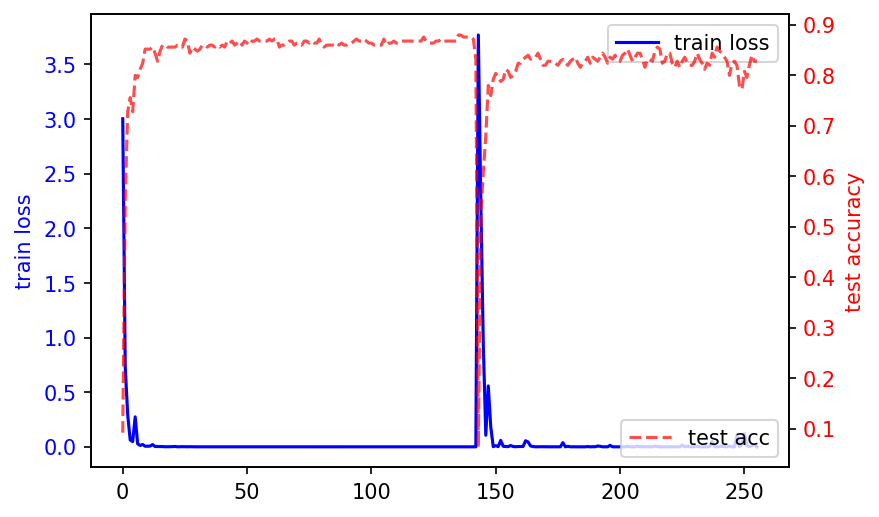

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=150)
ax.plot(trainloss,color='b', label='train loss')
ax.set_ylabel('train loss',color='b')
ax.tick_params(axis='y',labelcolor='b')
ax2 = ax.twinx()
ax2.plot(testacc,color='r', label='test acc',alpha=0.7,linestyle='--')
ax2.set_ylabel('test accuracy',color='r')
ax2.tick_params(axis='y',labelcolor='r')

ax.legend()
ax2.legend()
plt.savefig('traintest.png')